In [1]:
pip install krippendorff

In [1]:
import pandas as pd
import krippendorff

In [3]:
dataframe_posts = pd.read_excel("Evaluationsdatensatz-3.xlsx")

In [5]:
#subset, that was labeled by annotator 1 and 2 
dataframe_posts_IAA1 = dataframe_posts.iloc[0:1001]

In [7]:
#subset, that was labeled by annotator 3 and 4 
dataframe_posts_IAA2 = dataframe_posts.iloc[1002:2001]

In [9]:
#rename labels
label_mapping = {1: -1, 2: 0, 0: 1}

In [11]:
dataframe_posts_IAA1[["annotator_1", "annotator_2"]] = dataframe_posts[["annotator_1", "annotator_2"]].applymap(label_mapping.get)

/var/folders/z1/3s4_jtgd0lqbv7pqjl15y96h0000gn/T/ipykernel_95873/3287278601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_posts_IAA1[["annotator_1", "annotator_2"]] = dataframe_posts[["annotator_1", "annotator_2"]].applymap(label_mapping.get)


In [13]:
dataframe_posts_IAA2[["annotator_1", "annotator_2"]] = dataframe_posts[["annotator_1", "annotator_2"]].applymap(label_mapping.get)

/var/folders/z1/3s4_jtgd0lqbv7pqjl15y96h0000gn/T/ipykernel_95873/4269693341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_posts_IAA2[["annotator_1", "annotator_2"]] = dataframe_posts[["annotator_1", "annotator_2"]].applymap(label_mapping.get)


In [15]:
print(dataframe_posts_IAA1.head())

   Unnamed: 0           id                                               body  \
0       26492  DB8seh6tHE4  Ich habe großen Respekt davor, wenn Menschen a...   
1      304154  BTY30m2luaB  #streetart #Frankfurt am Main. \n#occupy #occu...   
2       34974  C-C715BoPFa  Sigmar #Gabriel war Ministerpräsident von Nied...   
3      528626  CbzjzXivCiX  Das ist Einsatz: Frans Timmermans ist heute zu...   
4      299924  B_2l6BogRvd  Ausschusssitzung aus dem #Büro in #Berlin Gut...   

             author_fullname                                    hashtags  \
0               Ricarda Lang                                Ricarda Lang   
1        Anke Domscheit-Berg  streetart,Frankfurt,occupy,occupyfrankfurt   
2  Julia Klöckner (she/her)  Gabriel,Atlantik-,Brücke,USA,Transatlantik   
3            Martin Rosemann                  Verpackungsteuer,Euhandelt   
4            Jens Zimmermann                 Büro,Berlin,Kaffeemaschine   

   annotator_1  annotator_2  ÜBEREINSTIMUNGEN  Unnamed: 

In [17]:
print(dataframe_posts_IAA2.head())

      Unnamed: 0           id  \
1002      478678  BzIgS5nIO56   
1003      456310  Cvz-KAmtX-N   
1004      288514  BXBX1axA09e   
1005      264186  CJ56wpEA8MM   
1006      460137  C6ty6tktfB5   

                                                   body       author_fullname  \
1002  ‪Sitzungsplan Plenum #bundestag für die Woche ...        Detlef Müller   
1003  Im Rahmen meiner Gesundheitswoche im Unstrut-H...          Tina Rudolph   
1004  Mit unserem Parteichef Horst Seehofer beim Bez...        Volker Ullrich   
1005  Willkommen im Überwachungsstaat nach chinesisc...  Norbert Kleinwächter   
1006  Kommunalwahlkampf in Schwerin: Tag für Tag sin...        Leif-Erik Holm   

                                               hashtags  annotator_1  \
1002                                          bundestag            0   
1003  mühlhausen,mhl,muehlhausen,uhk,unstruthainichk...            0   
1004                                       CSU,Augsburg            1   
1005  Handy,Bußgeld,Corona

In [19]:
ratings = dataframe_posts_IAA1[["annotator_1", "annotator_2"]].T.values

In [21]:
alpha = krippendorff.alpha(reliability_data=ratings, level_of_measurement="nominal")

In [23]:
print(f"Krippendorffs Alpha between Annotator 1 and 2: {alpha:.3f}")

Krippendorffs Alpha between Annotator 1 and 2: 0.820


In [25]:
ratings = dataframe_posts_IAA2[["annotator_1", "annotator_2"]].T.values

In [27]:
alpha = krippendorff.alpha(reliability_data=ratings, level_of_measurement="nominal")

In [29]:
print(f"Krippendorffs Alpha between Annotator 3 and 4: {alpha:.3f}")

Krippendorffs Alpha between Annotator 3 and 4: 0.912


In [ ]:
#Comparison of model outputs with gold standard

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataframe_goldstandard = pd.read_excel("Evaluationsdatensatz-3.xlsx")

In [5]:
dataframe_model_outputs = pd.read_excel("Evaluationstexte_mit_Modellergebnissen.xlsx")

In [7]:
label_mapping = {1:"negative", 0:"positive", 2:"neutral"}

In [6]:
print(dataframe_goldstandard.head())

   Unnamed: 0           id                                               body  \
0       26492  DB8seh6tHE4  Ich habe großen Respekt davor, wenn Menschen a...   
1      304154  BTY30m2luaB  #streetart #Frankfurt am Main. \n#occupy #occu...   
2       34974  C-C715BoPFa  Sigmar #Gabriel war Ministerpräsident von Nied...   
3      528626  CbzjzXivCiX  Das ist Einsatz: Frans Timmermans ist heute zu...   
4      299924  B_2l6BogRvd  Ausschusssitzung aus dem #Büro in #Berlin Gut...   

             author_fullname                                    hashtags  \
0               Ricarda Lang                                Ricarda Lang   
1        Anke Domscheit-Berg  streetart,Frankfurt,occupy,occupyfrankfurt   
2  Julia Klöckner (she/her)  Gabriel,Atlantik-,Brücke,USA,Transatlantik   
3            Martin Rosemann                  Verpackungsteuer,Euhandelt   
4            Jens Zimmermann                 Büro,Berlin,Kaffeemaschine   

   annotator_1  annotator_2  ÜBEREINSTIMUNGEN  Unnamed: 

In [9]:
dataframe_goldstandard[["ÜBEREINSTIMUNGEN"]] = dataframe_goldstandard[["ÜBEREINSTIMUNGEN"]].applymap(label_mapping.get)

<ipython-input-9-9c8258a5bd95>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataframe_goldstandard[["ÜBEREINSTIMUNGEN"]] = dataframe_goldstandard[["ÜBEREINSTIMUNGEN"]].applymap(label_mapping.get)


In [10]:
print(dataframe_model_outputs.head())

   Unnamed: 0           id                                               body  \
0       26492  DB8seh6tHE4  Ich habe großen Respekt davor, wenn Menschen a...   
1      304154  BTY30m2luaB  #streetart #Frankfurt am Main. \n#occupy #occu...   
2       34974  C-C715BoPFa  Sigmar #Gabriel war Ministerpräsident von Nied...   
3      528626  CbzjzXivCiX  Das ist Einsatz: Frans Timmermans ist heute zu...   
4      299924  B_2l6BogRvd  Ausschusssitzung aus dem #Büro in #Berlin Gut...   

             author_fullname                                    hashtags  \
0               Ricarda Lang                                         NaN   
1        Anke Domscheit-Berg  streetart,Frankfurt,occupy,occupyfrankfurt   
2  Julia Klöckner (she/her)  Gabriel,Atlantik-,Brücke,USA,Transatlantik   
3            Martin Rosemann                  Verpackungsteuer,Euhandelt   
4            Jens Zimmermann                 Büro,Berlin,Kaffeemaschine   

   annotator_1  annotator_2  Unnamed: 7  Unnamed: 8  \
0

In [11]:
dataframe_evaluation = dataframe_goldstandard.merge(dataframe_model_outputs, on="id", how="left", suffixes=("", "_modell"))

In [12]:
print(dataframe_evaluation.head())

   Unnamed: 0           id                                               body  \
0       26492  DB8seh6tHE4  Ich habe großen Respekt davor, wenn Menschen a...   
1      304154  BTY30m2luaB  #streetart #Frankfurt am Main. \n#occupy #occu...   
2       34974  C-C715BoPFa  Sigmar #Gabriel war Ministerpräsident von Nied...   
3      528626  CbzjzXivCiX  Das ist Einsatz: Frans Timmermans ist heute zu...   
4      299924  B_2l6BogRvd  Ausschusssitzung aus dem #Büro in #Berlin Gut...   

             author_fullname                                    hashtags  \
0               Ricarda Lang                                Ricarda Lang   
1        Anke Domscheit-Berg  streetart,Frankfurt,occupy,occupyfrankfurt   
2  Julia Klöckner (she/her)  Gabriel,Atlantik-,Brücke,USA,Transatlantik   
3            Martin Rosemann                  Verpackungsteuer,Euhandelt   
4            Jens Zimmermann                 Büro,Berlin,Kaffeemaschine   

   annotator_1  annotator_2 ÜBEREINSTIMUNGEN  Unnamed: 8

In [13]:
dataframe_evaluation = dataframe_evaluation.drop(columns=[col for col in dataframe_evaluation.columns if col.endswith("_modell")])

In [14]:
print(dataframe_evaluation.head())

   Unnamed: 0           id                                               body  \
0       26492  DB8seh6tHE4  Ich habe großen Respekt davor, wenn Menschen a...   
1      304154  BTY30m2luaB  #streetart #Frankfurt am Main. \n#occupy #occu...   
2       34974  C-C715BoPFa  Sigmar #Gabriel war Ministerpräsident von Nied...   
3      528626  CbzjzXivCiX  Das ist Einsatz: Frans Timmermans ist heute zu...   
4      299924  B_2l6BogRvd  Ausschusssitzung aus dem #Büro in #Berlin Gut...   

             author_fullname                                    hashtags  \
0               Ricarda Lang                                Ricarda Lang   
1        Anke Domscheit-Berg  streetart,Frankfurt,occupy,occupyfrankfurt   
2  Julia Klöckner (she/her)  Gabriel,Atlantik-,Brücke,USA,Transatlantik   
3            Martin Rosemann                  Verpackungsteuer,Euhandelt   
4            Jens Zimmermann                 Büro,Berlin,Kaffeemaschine   

   annotator_1  annotator_2 ÜBEREINSTIMUNGEN  Unnamed: 8

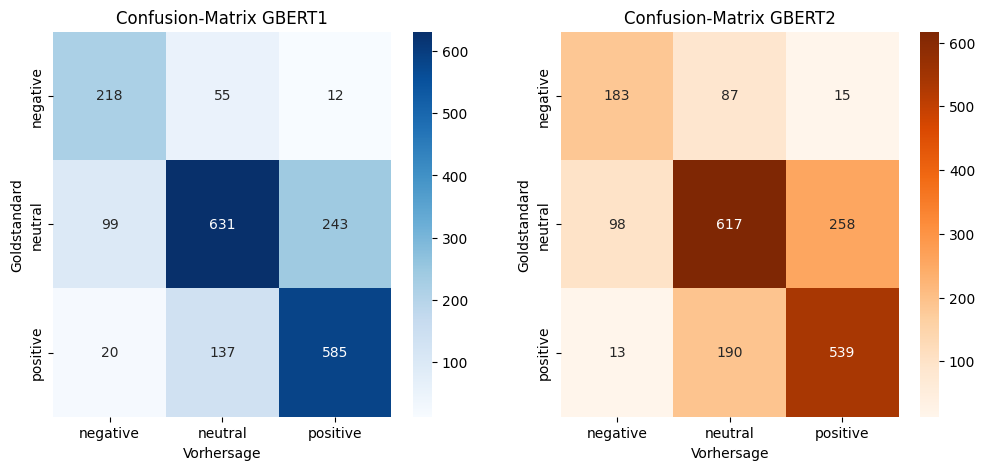

In [18]:

cm1 = confusion_matrix(dataframe_evaluation["ÜBEREINSTIMUNGEN"], dataframe_evaluation["GBERT1"])
cm2 = confusion_matrix(dataframe_evaluation["ÜBEREINSTIMUNGEN"], dataframe_evaluation["GBERT2"])

labels = ["negative", "neutral", "positive"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title("Confusion-Matrix GBERT1")
axes[0].set_xlabel("Vorhersage")
axes[0].set_ylabel("Goldstandard")

sns.heatmap(cm2, annot=True, fmt="d", cmap="Oranges", ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title("Confusion-Matrix GBERT2")
axes[1].set_xlabel("Vorhersage")
axes[1].set_ylabel("Goldstandard")

plt.show()

In [19]:
print("GBERT1:")
print(classification_report(dataframe_evaluation["ÜBEREINSTIMUNGEN"], dataframe_evaluation["GBERT1"]))

GBERT1:
              precision    recall  f1-score   support

    negative       0.65      0.76      0.70       285
     neutral       0.77      0.65      0.70       973
    positive       0.70      0.79      0.74       742

    accuracy                           0.72      2000
   macro avg       0.70      0.73      0.71      2000
weighted avg       0.72      0.72      0.72      2000



In [20]:
print("GBERT2:")
print(classification_report(dataframe_evaluation["ÜBEREINSTIMUNGEN"], dataframe_evaluation["GBERT2"]))

GBERT2:
              precision    recall  f1-score   support

    negative       0.62      0.64      0.63       285
     neutral       0.69      0.63      0.66       973
    positive       0.66      0.73      0.69       742

    accuracy                           0.67      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.67      0.67      0.67      2000

